In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
import pandas as pd
import numpy as np
import string
from gensim import corpora
import gensim
from nltk.corpus import words
from gensim.models import LdaModel, LsiModel, Word2Vec
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA

In [4]:
# stop words
from spacy.lang.en import STOP_WORDS
stop_wrd = []
with open('stopword.txt') as f:
    for c in f:
        c = c.replace(",","").replace("\n","").replace('"',"").strip()
        stop_wrd.append(c)
stop = list(STOP_WORDS)


In [5]:
############### verified_negativecomment #############

In [6]:
doc_complete = []
with open('verified_negativecomment.txt') as f:
    for l in f:
        doc_complete.append(l)   

In [7]:
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    stop_free = " ".join([i for i in punc_free.split() if i not in stop_wrd])
    normalized = " ".join(lemma.lemmatize(word) for word in stop_free.split())
    return normalized
doc_clean = [clean(doc).split() for doc in doc_complete]


In [9]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
Lda = gensim.models.ldamulticore.LdaMulticore
ldamodel = Lda(doc_term_matrix, num_topics=200, id2word = dictionary, passes=20)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/gensim/models/ldamodel.py:775: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
#LDA Model

In [161]:
print(ldamodel.print_topics(num_topics=20))

[(179, u'0.488*"india" + 0.105*"pakistan" + 0.075*"indian" + 0.054*"country" + 0.020*"speak" + 0.018*"mother" + 0.015*"bangladesh" + 0.011*"people" + 0.010*"afghanistan" + 0.009*"time"'), (6, u'0.210*"kill" + 0.044*"release" + 0.038*"labor" + 0.037*"people" + 0.035*"enjoy" + 0.032*"powerful" + 0.031*"backward" + 0.027*"sunni" + 0.022*"tool" + 0.021*"vested"'), (165, u'0.216*"china" + 0.091*"chinese" + 0.087*"japan" + 0.069*"pak" + 0.036*"trade" + 0.027*"develop" + 0.022*"purchase" + 0.020*"obvious" + 0.020*"coward" + 0.020*"stick"'), (102, u'0.414*"easier" + 0.043*"medical" + 0.036*"add" + 0.033*"payer" + 0.033*"theyre" + 0.030*"catch" + 0.028*"earned" + 0.020*"stuck" + 0.018*"begin" + 0.015*"ride"'), (71, u'0.133*"blind" + 0.098*"eye" + 0.064*"mouth" + 0.050*"shut" + 0.050*"decide" + 0.046*"keeping" + 0.028*"policeman" + 0.028*"leadership" + 0.027*"people" + 0.022*"khangress"'), (78, u'0.309*"case" + 0.183*"court" + 0.042*"supreme" + 0.028*"raje" + 0.020*"justice" + 0.018*"kick" + 0.0

In [210]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)

/home/ubuntu/.virtualenvs/nlp/local/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
179    1.815850        1       1 -0.176437  0.187551
48     1.285372        1       2 -0.194076  0.016018
107    1.205033        1       3 -0.046165  0.093381
36     1.197697        1       4 -0.041740  0.241239
124    1.152305        1       5 -0.101844  0.062740
26     1.139798        1       6  0.028775  0.056978
168    0.930666        1       7 -0.145680  0.064048
101    0.905607        1       8 -0.103743 -0.056361
16     0.891174        1       9 -0.149951 -0.060953
47     0.875978        1      10 -0.133568  0.087955
60     0.873757        1      11 -0.126991 -0.058781
3      0.836980        1      12 -0.070218  0.012203
54     0.834923        1      13 -0.155709 -0.020284
49     0.812096        1      14 -0.111960  0.034524
53     0.810839        1      15  0.036759  0.012793
78     0.798775        1      16 -0.023688  0.077139
143    0.796933        1      17 -0.162254 -0.044469
4      0.792119        1      18  0.015844  0.016848
35     0.767099        1      19 -0.037968  0.041337
156    0.724658        1      20 -0.066990 -0.016527
112    0.716372        1      21 -0.111301  0.065435
62     0.715442        1      22 -0.148253  0.013409
142    0.707363        1      23  0.003379  0.008851
24     0.705473        1      24  0.044313  0.005496
148    0.686694        1      25 -0.081147  0.002979
12     0.681679        1      26 -0.068332 -0.039359
37     0.673544        1      27  0.002878  0.167276
195    0.671432        1      28 -0.088243 -0.028080
11     0.670086        1      29  0.021944  0.009595
30     0.669565        1      30 -0.041650 -0.018335
...         ...      ...     ...       ...       ...
131    0.333678        1     171  0.068192  0.004188
6      0.333439        1     172 -0.052968 -0.018735
169    0.329669        1     173 -0.069936 -0.051210
113    0.328545        1     174 -0.002217  0.016656
95     0.327365        1     175  0.033902 -0.008340
63     0.326714        1     176  0.034972 -0.028134
117    0.325891        1     177  0.090618 -0.009931
27     0.318812        1     178 -0.026251 -0.027391
191    0.316159        1     179 -0.023592 -0.069516
181    0.316005        1     180  0.016659 -0.052565
51     0.314108        1     181  0.083232 -0.015145
9      0.312738        1     182  0.061193 -0.007814
187    0.309857        1     183  0.018779 -0.060019
177    0.308155        1     184  0.057398  0.025387
61     0.294512        1     185  0.095787 -0.009777
0      0.290937        1     186  0.076305 -0.011666
193    0.287485        1     187  0.058748 -0.040123
55     0.287265        1     188  0.038267 -0.053901
23     0.285788        1     189  0.087787  0.002613
77     0.284604        1     190  0.079739 -0.027776
157    0.279847        1     191  0.055748  0.023180
91     0.278364        1     192  0.037245 -0.015434
197    0.276475        1     193  0.088930 -0.028218
173    0.269133        1     194  0.089984 -0.021097
5      0.265514        1     195  0.027602 -0.042799
126    0.257664        1     196  0.089897 -0.021387
64     0.246683        1     197  0.087539 -0.036003
92     0.243448        1     198  0.062599 -0.036965
185    0.226313        1     199  0.044050  0.077511
70     0.222117        1     200  0.009709 -0.058711

[200 rows x 5 columns], topic_info=       Category          Freq          Term         Total  loglift  logprob
term                                                                       
41868   Default  19720.000000         india  19720.000000  30.0000  30.0000
4107    Default  10740.000000          year  10740.000000  29.0000  29.0000
33322   Default   8575.000000         money   8575.000000  28.0000  28.0000
79965   Default   9462.000000    government   9462.000000  27.0000  27.0000
71100   Default   6918.000000          govt   6918.000000  26.0000  26.0000
57496   Default   7273.000000         party   7273.000000  25.

In [ ]:
# LSI Model

In [54]:
model = LsiModel(doc_term_matrix, id2word=dictionary,num_topics=20)  # train model

In [18]:
# for c in model.print_topics(200):
#     print c

In [ ]:
#Heat map

In [55]:
K = model.num_topics
columns = []
columns_dict = {}
for k in range(1,K+1):
    columns.append(str(k))
    columns_dict[k-1] = ""

In [62]:
df = pd.DataFrame(columns = columns)
pd.set_option('display.width', 1000)
zz = np.zeros(shape=(1000,K))
last_number=0
DC={}
for x in range (10):
  data = pd.DataFrame(columns_dict,index=[0])
  df=df.append(data,ignore_index=True)  
for line in model.print_topics(num_topics=K):
    tp, w = line
    print tp
    probs=w.split("+")
    y=0
    for pr in probs:
        a=pr.split("*")
        df.iloc[y,tp] = a[1]       
        if a[1] in DC:
           zz[DC[a[1]]][tp]=a[0]
        else:
           zz[last_number][tp]=a[0]
           DC[a[1]]=last_number
           last_number=last_number+1
        y=y+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


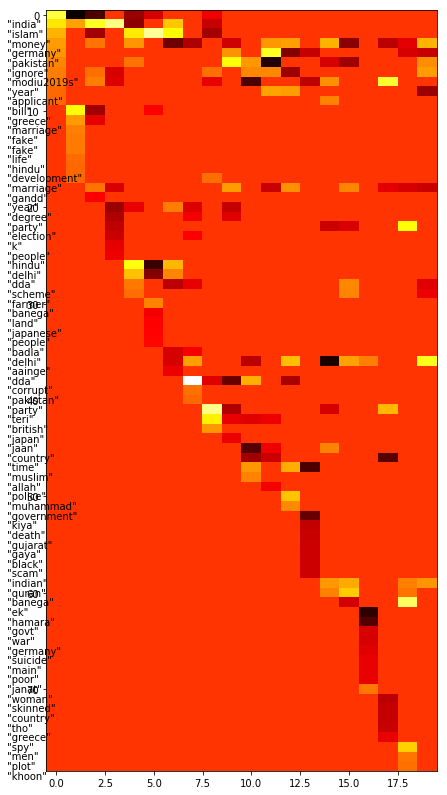

In [58]:
zz=np.resize(zz,(len(DC.keys()),zz.shape[1]))
plt.figure(figsize = (7,14))
plt.imshow(zz, cmap='hot', interpolation='nearest',aspect='auto')
for val, key in enumerate(DC.keys()):
        plt.text(-2.5, val + 0.5, key,
                 horizontalalignment='left',
                 verticalalignment='top'
                 )
plt.show()

In [59]:
def topics_to_vectorspace(n_topics, n_words=100):
    rows = []
    for i in xrange(n_topics):
        temp = model.show_topic(i, n_words)
        row = dict(((j[1],j[0]) for j in temp))
        rows.append(row)
    return rows
vec = DictVectorizer()
X = vec.fit_transform(topics_to_vectorspace(K))
X.shape

(20, 1984)

In [234]:
# PCA

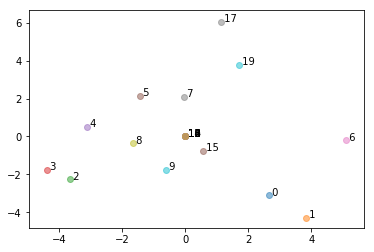

In [60]:
pca = PCA(n_components=2)
X_pca = pca.fit(X.toarray()).transform(X.toarray())
for i in xrange(X_pca.shape[0]):
    plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
    plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + str(i))    
plt.show()

In [199]:
# X_pca = pca.fit(X.T.toarray()).transform(X.T.toarray())
# plt.figure(figsize=(20,20)) 
# for i, n in enumerate(vec.get_feature_names()):
#     plt.scatter(X_pca[i, 0], X_pca[i, 1], alpha=.5)
#     plt.text(X_pca[i, 0], X_pca[i, 1], s=' ' + n, fontsize=8)
# plt.show()

/home/ubuntu/.virtualenvs/nlp/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


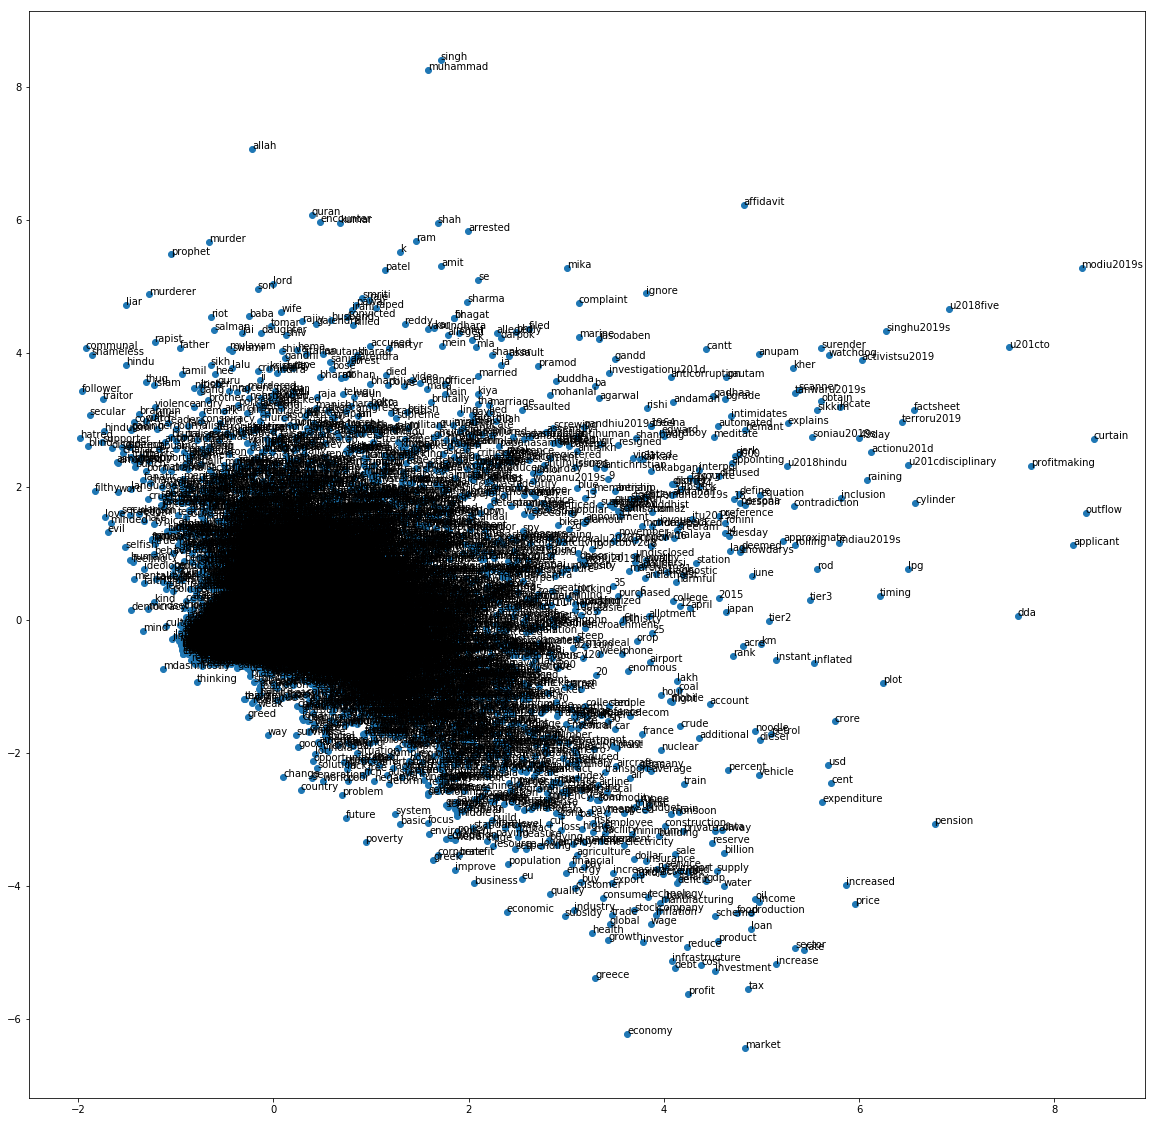

In [207]:
sentences = doc_clean
model = Word2Vec(sentences,workers=3)
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.figure(figsize = (20,20))
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()